In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import math

In [10]:
df = pd.read_csv(r"C:\Users\Administrator\Documents\Vizmonte\2022\UNICEF-AEDES\03 Data\sample_feature_eng_data.csv")

In [11]:
df

,longitude,latitude,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,nearest_clinic_hospital_doctors_1,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,count_toilets_water_point_within_5.0km,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1,count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km,nearest_college_school_university_kindergarten_1,count_college_school_university_kindergarten_within_5.0km
0,121.111599,14.662168,0.154349,0.000000,-0.009122,-0.156812,0.009122,116.431122,36.436481,0.000001,77.704048,1534.389038,36,1701.104004,11,5000.000000,0,578.794006,39
1,121.124187,14.595171,0.191877,0.047703,-0.076692,-0.117247,0.076692,147.654912,33.343179,0.000001,77.704048,3574.030029,1,5000.000000,0,5000.000000,0,1383.277954,5
2,121.049989,14.627311,0.096444,0.000000,-0.027322,-0.076104,0.027322,208.057934,36.603021,0.000001,77.704048,301.251007,94,611.062988,63,3957.620117,3,218.983993,102
3,121.123821,14.607332,0.188294,0.052000,-0.068768,-0.124935,0.068768,148.002541,35.082785,0.000001,77.704048,3630.863037,5,3958.146973,1,5000.000000,0,794.432983,12
4,121.056969,14.760809,0.130988,0.032000,-0.038837,-0.101535,0.038837,209.410579,35.887674,0.000002,81.611534,905.219971,21,5000.000000,0,2468.038086,3,640.960998,27
5,121.109635,14.774914,0.255936,0.072313,-0.150703,-0.098028,0.150703,167.021438,28.715742,0.000002,81.611534,4803.504883,1,5000.000000,0,5000.000000,0,5000.000000,0
6,121.055999,14.715158,0.183977,0.032000,-0.038357,-0.151722,0.038357,91.752551,34.183578,0.000001,77.704048,1515.254028,29,2706.799072,6,2720.376953,3,764.935974,51
7,121.006965,14.755321,0.147548,0.031421,-0.062156,-0.086268,0.062156,167.693095,33.448975,0.000002,79.942336,2438.245117,5,5000.000000,0,5000.000000,0,1834.035034,9
8,121.006112,14.730959,0.131161,0.035000,-0.032143,-0.097330,0.032143,104.947103,34.580623,0.000001,77.704048,1535.552979,13,4318.825195,1,5000.000000,0,2139.697998,15
9,121.049241,14.708261,0.159662,0.000000,-0.018920,-0.151231,0.018920,95.233716,34.907083,0.000001,77.704048,638.473999,24,2800.072021,6,4421.373047,1,746.562988,50


In [14]:
len(df.columns)

19

In [12]:
df.corr()

,longitude,latitude,ndvi,fapar,ndbi,ndwi,ndmi,aerosol,surface_temperature,precipitation_rate,relative_humidity,nearest_clinic_hospital_doctors_1,count_clinic_hospital_doctors_within_5.0km,nearest_toilets_water_point_1,count_toilets_water_point_within_5.0km,nearest_sanitary_dump_station_waste_disposal_waste_transfer_station_1,count_sanitary_dump_station_waste_disposal_waste_transfer_station_within_5.0km,nearest_college_school_university_kindergarten_1,count_college_school_university_kindergarten_within_5.0km
longitude,1.000000,-0.038178,0.517825,0.377766,-0.333831,-0.536159,0.333831,-0.337317,-0.372797,-0.013114,-0.077933,0.507785,-0.225299,0.077528,0.015470,0.015005,-0.026082,0.133739,-0.279649
latitude,-0.038178,1.000000,0.542532,0.644137,-0.460319,-0.337414,0.460319,-0.275801,-0.580499,0.552026,0.601223,0.370143,-0.638324,0.756952,-0.557632,-0.212310,0.125772,0.545846,-0.624141
ndvi,0.517825,0.542532,1.000000,0.769572,-0.879861,-0.631936,0.879861,-0.442848,-0.755776,0.161358,0.196563,0.558309,-0.537565,0.571375,-0.323590,-0.121315,0.064031,0.615036,-0.603535
fapar,0.377766,0.644137,0.769572,1.000000,-0.809017,-0.238816,0.809017,-0.285844,-0.864094,0.297586,0.309849,0.613795,-0.684792,0.686498,-0.550169,-0.074247,0.031768,0.698221,-0.712135
ndbi,-0.333831,-0.460319,-0.879861,-0.809017,1.000000,0.195910,-1.000000,0.135133,0.808427,-0.263979,-0.287235,-0.489498,0.475013,-0.528135,0.309866,0.087937,-0.054903,-0.699405,0.565286
ndwi,-0.536159,-0.337414,-0.631936,-0.238816,0.195910,1.000000,-0.195910,0.613601,0.186592,0.037027,0.005667,-0.367561,0.318690,-0.334244,0.150916,0.086643,-0.025750,-0.100317,0.320516
ndmi,0.333831,0.460319,0.879861,0.809017,-1.000000,-0.195910,1.000000,-0.135133,-0.808427,0.263979,0.287235,0.489498,-0.475013,0.528135,-0.309866,-0.087937,0.054903,0.699405,-0.565286
aerosol,-0.337317,-0.275801,-0.442848,-0.285844,0.135133,0.613601,-0.135133,1.000000,0.355145,0.426359,0.413959,-0.326383,0.346017,-0.197438,0.339442,-0.064139,0.171284,-0.247052,0.276100
surface_temperature,-0.372797,-0.580499,-0.755776,-0.864094,0.808427,0.186592,-0.808427,0.355145,1.000000,-0.157254,-0.173316,-0.608585,0.644539,-0.517705,0.439102,-0.018941,0.073234,-0.710551,0.663041
precipitation_rate,-0.013114,0.552026,0.161358,0.297586,-0.263979,0.037027,0.263979,0.426359,-0.157254,1.000000,0.979749,0.141965,-0.289352,0.498343,-0.266468,-0.185317,0.098857,0.277448,-0.346793


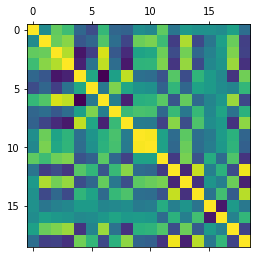

In [13]:
plt.matshow(df.corr())
plt.show()

In [19]:
import pandas as pd
import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(5, 5))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4
0,1.000000,0.861882,-0.687578,0.220408,-0.965567
1,0.861882,1.000000,-0.770134,-0.283359,-0.807373
2,-0.687578,-0.770134,1.000000,0.341363,0.701713
3,0.220408,-0.283359,0.341363,1.000000,-0.262302
4,-0.965567,-0.807373,0.701713,-0.262302,1.000000
